# lib

In [1]:
import pickle
# import warnings
# warnings.filterwarnings('ignore')
# import os
import pandas as pd
import numpy as np
# import math
# import datetime as dt
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler

# from itertools import product
# import statsmodels.api as sm

import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, ConvLSTM1D, Conv1D, Concatenate, Bidirectional
from tensorflow.keras.layers import LSTM , BatchNormalization, AveragePooling1D, Flatten, GRU, SimpleRNN

# from itertools import cycle
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

plt.style.use('seaborn-darkgrid')

C:\Users\WEBFLAX-FOUR\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\WEBFLAX-FOUR\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\WEBFLAX-FOUR\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# creat data lstm

In [3]:
with open('btc_stan.moh','rb') as f :
    btc = pickle.load(f)

In [4]:
btc = pd.read_csv('btc.csv',skiprows=1)
btc = btc[::-1].reset_index()
btcc = np.log(btc['close'])/np.log(btc['close'][0])
btc = pd.DataFrame()
btc['close'] = btcc
btc['target'] = btc['close'].shift(-1)
btc = btc.dropna()
btc

,close,target
0,1.000000,1.000197
1,1.000197,0.998677
2,0.998677,1.000943
3,1.000943,1.001326
4,1.001326,1.000175
...,...,...
2719,1.738803,1.743872
2720,1.743872,1.732626
2721,1.732626,1.732021
2722,1.732021,1.734009


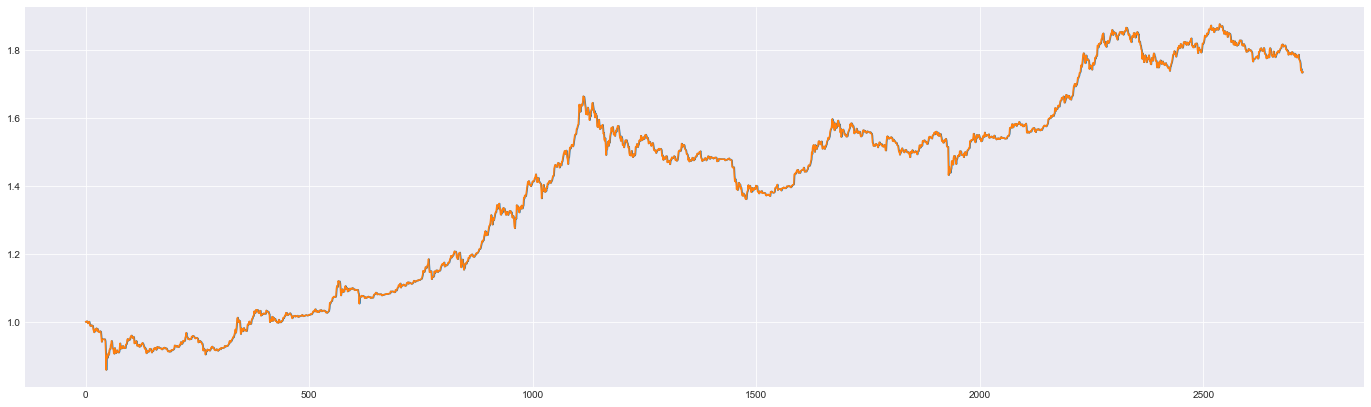

In [5]:
plt.figure(figsize=(24,7))
plt.plot(btc)

In [6]:
look_back_ = 90
prediction_days = 60
future_ = 30


df_train_= btc[:][:len(btc)-(prediction_days+future_)]#values.reshape(-1,1)

df_test_= btc[:][len(btc)-(prediction_days+future_+look_back_-1):len(btc)-future_]#.values.reshape(-1,1)

future_ = btc[:][len(btc)-(future_+look_back_-1):]

In [7]:
df_train_.columns

Index(['close', 'target'], dtype='object')

In [8]:
col = ['close', 'close', 'target', 'target']
df_train = df_train_[:][col]
df_test = df_test_[:][col]
future = future_[:][col]
df_test.head(2)

,close,close,target,target
2545,1.855624,1.855624,1.856271,1.856271
2546,1.856271,1.856271,1.846331,1.846331


In [9]:
# # many to one

# from collections import deque
# def dataset_generator_lstm(dataset, look_back=look_back_):
#   sequential_data = [] 
#   prev_days = deque(maxlen=look_back)
#   for i in dataset.values:
#     prev_days.append([n for n in i[:-1]])
#     if len(prev_days) == look_back:  
#       sequential_data.append([np.array(prev_days), i[-1]])
#   dataX=[]
#   dataY=[]
#   for seq, target in sequential_data: 
#     dataX.append(seq) 
#     dataY.append(target) 
#   return np.array(dataX), np.array(dataY)

# trainX, trainY = dataset_generator_lstm(df_train)

# testX, testY = dataset_generator_lstm(df_test)
# # trainX, trainY = trainX[:1740], trainY[:1740]

# futureX, futureY = dataset_generator_lstm(future)

# print("trainX: ", trainX.shape)
# print("trainY: ", trainY.shape)
# print("testX: ", testX.shape)
# print("testY", testY.shape)
# print("futureX: ", futureX.shape)
# print("futureY", futureY.shape)

In [10]:
# one to one

from collections import deque
def dataset_generator_lstm(dataset, look_back=look_back_):
    sequential_data = [] 
    sequential_data_log = [] 
    prev_days = deque(maxlen=look_back)
    prev_days_log = deque(maxlen=look_back)

    for i in dataset.values:
        prev_days_log.append(i[0])
        prev_days.append(i[1])

        if len(prev_days) == look_back:  
            sequential_data_log.append([np.array(prev_days), i[-1]])
            sequential_data.append([np.array(prev_days), i[-2]])
      
      
    dataX_log=[]
    dataY_log=[]

    dataX=[]
    dataY=[]

    for seq, target in sequential_data_log: 
        dataX_log.append(seq) 
        dataY_log.append(target) 

    for seq, target in sequential_data: 
        dataX.append(seq) 
        dataY.append(target) 

    dataX_log = tf.expand_dims(dataX_log,axis=2)
    dataX = tf.expand_dims(dataX,axis=2)

    return np.array(dataX_log), np.array(dataY_log), np.array(dataX), np.array(dataY)

trainX_log, trainY_log, trainX, trainY = dataset_generator_lstm(df_train)

testX_log, testY_log, testX, testY = dataset_generator_lstm(df_test)
# trainX, trainY = trainX[:1740], trainY[:1740]

futureX_log, futureY_log, futureX, futureY = dataset_generator_lstm(future)

print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("trainX_log: ", trainX_log.shape)
print("trainY_log: ", trainY_log.shape)
print("testX: ", testX.shape)
print("testY", testY.shape)
print("testX_log: ", testX_log.shape)
print("testY_log", testY_log.shape)
print("futureX: ", futureX.shape)
print("futureY", futureY.shape)
print("futureX_log: ", futureX_log.shape)
print("futureY_log", futureY_log.shape)

trainX:  (2545, 90, 1)
trainY:  (2545,)
trainX_log:  (2545, 90, 1)
trainY_log:  (2545,)
testX:  (60, 90, 1)
testY (60,)
testX_log:  (60, 90, 1)
testY_log (60,)
futureX:  (30, 90, 1)
futureY (30,)
futureX_log:  (30, 90, 1)
futureY_log (30,)


# test test

In [11]:
from tensorflow.keras.models import load_model

model_from_saved_checkpoint = load_model('my_best_model_v06.hdf5')

In [12]:
# batch_size = 1


# model_from_saved_checkpoint = Sequential()


# model_from_saved_checkpoint.add(LSTM(units = 256, activation = 'relu', return_sequences=True, batch_input_shape = (batch_size, trainX.shape[1], trainX.shape[2]), stateful=True)) #  dropout=0.25, recurrent_dropout=0.1,
# model_from_saved_checkpoint.add(Dropout(0.2))

# model_from_saved_checkpoint.add(LSTM(units = 512, activation = 'relu', return_sequences=True, batch_input_shape = (batch_size, trainX.shape[1], trainX.shape[2]), stateful=True)) #  dropout=0.25, recurrent_dropout=0.1,
# model_from_saved_checkpoint.add(Dropout(0.3))

# model_from_saved_checkpoint.add(LSTM(units = 1024, activation = 'relu', return_sequences=True, batch_input_shape = (batch_size, trainX.shape[1], trainX.shape[2]), stateful=True)) #  dropout=0.25, recurrent_dropout=0.1,
# model_from_saved_checkpoint.add(Dropout(0.4))

# model_from_saved_checkpoint.add(LSTM(units = 128, activation = 'relu', batch_input_shape = (batch_size, trainX.shape[1], trainX.shape[2]), stateful=True))
# model_from_saved_checkpoint.add(Dropout(0.2))


# model_from_saved_checkpoint.add(Dense(units = 32, activation = 'relu'))
# model_from_saved_checkpoint.add(Dropout(0.3))

# model_from_saved_checkpoint.add(Dense(units = 1))


# model_from_saved_checkpoint.load_weights('my_best_model_full.hdf5')
    
# model_from_saved_checkpoint.summary()



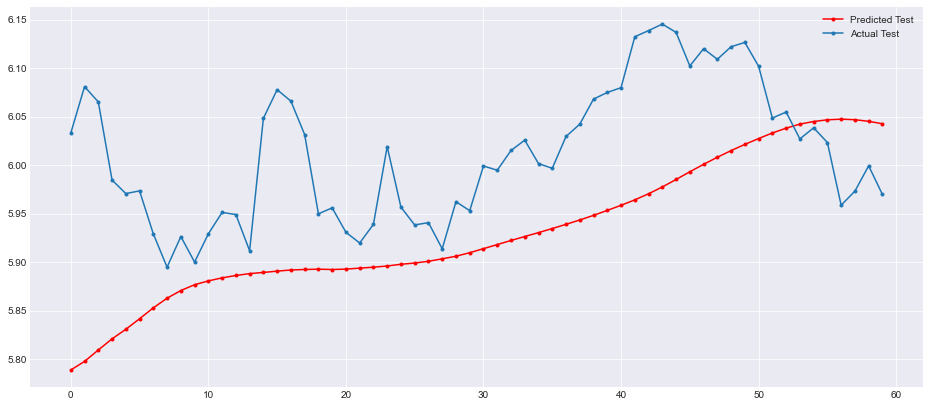

In [13]:
plt.figure(figsize=(16,7))

# log
predicted_btc_price_test_data = model_from_saved_checkpoint.predict(testX)
predicted_btc_price_test_data = np.array(predicted_btc_price_test_data).reshape(-1, 1)
test_actual = testY.reshape(-1, 1)

plt.plot(np.exp(predicted_btc_price_test_data), 'r', marker='.', label='Predicted Test')
plt.plot(np.exp(test_actual), marker='.', label='Actual Test')

# # manoal
# predicted_btc_price_test_data = model_from_saved_checkpoint.predict(testX)
# predicted_btc_price_test_data = scaler_t.inverse_transform(predicted_btc_price_test_data.reshape(-1, 1))
# test_actual = scaler_t.inverse_transform(testY.reshape(-1, 1))

# plt.plot(predicted_btc_price_test_data, 'r', marker='.', label='Predicted Test')
# plt.plot(test_actual, marker='.', label='Actual Test')


plt.legend()
plt.show()

# test train

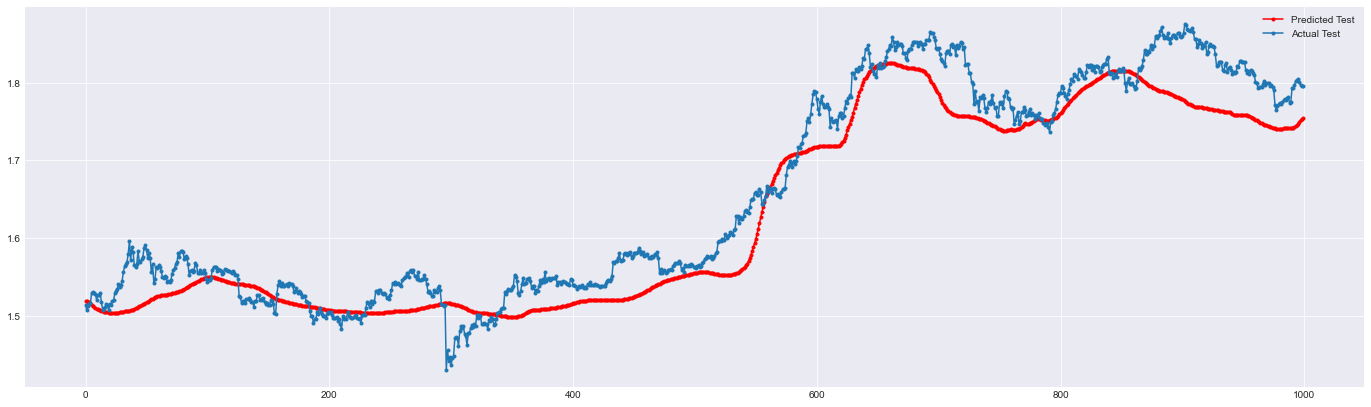

In [14]:
plt.figure(figsize=(24,7))

# log
predicted_btc_price_train_data = model_from_saved_checkpoint.predict(trainX[-1000:])
predicted_btc_price_train_data = np.array(predicted_btc_price_train_data).reshape(-1, 1)
train_actual = np.array(trainY[-1000:]).reshape(-1, 1)

plt.plot(predicted_btc_price_train_data, 'r', marker='.', label='Predicted Test')
plt.plot(train_actual, marker='.', label='Actual Test')

# # manoal
# predicted_btc_price_train_data = model_from_saved_checkpoint.predict(trainX)
# predicted_btc_price_train_data = scaler_t.inverse_transform(predicted_btc_price_train_data.reshape(-1, 1))
# train_actual = scaler_t.inverse_transform(trainY.reshape(-1, 1))

# plt.plot(predicted_btc_price_train_data, 'r', marker='.', label='Predicted Test')
# plt.plot(train_actual, marker='.', label='Actual Test')


plt.legend()
plt.show()